**Problem Statement**

Lending Club's model for risk assessment categorizes borrowers by assigning them a grade and subgrade such as A,B,C,... based on their credit history.

The information availabe for each loan consits of all the details of the loans at the time of their issuance and information relative to loan status such as with interest, how mcuch does the principal and whether the loan is fully paid or defaulted or is there any late payment by the borrower etc.

The goal is to provide investors and borrowers additional insights regarding with investment opportunities. 


**Lending Club Analysis Overview**
Description 
Business Problem 
Data Preparation 
Data Cleaning 
Models : EDA , K-Nearest Neighbor , K-Fold
Summary of Findings
Conclusion

**Description**


Lending Club is a peer to peer lending company based in US in which Lending Club connects borowers with investors where borrowers can apply for a loan within few minutes.

Lending Club employees check if investors and borrowers meet their criteria. The verification procedure will take about 7 days. After successful verification process, the borrower's loan will appear on the platform. 


Lending Club has been in the business since 2007, and has issued over 26 billion dollars in loans to more than 1.5 million borrowers.

The data contains 890K columns and 75 rows 



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
loan = pd.read_csv('./data/loan.csv', encoding = 'latin-1')

/Users/Dahu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
loan.index #the row index 

RangeIndex(start=0, stop=887379, step=1)

In [78]:
loan.shape #no of rows and columns 

(887379, 74)

In [79]:
loan.columns #column names(which is "an index")

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [80]:
loan.head().isnull() #show false not missing, true if missing 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [81]:
loan.isnull().sum(axis = 0) #no of missing values in each of columns 

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

**Data Cleaning**

In [82]:
def removeNulls(dataframe, axis = 1, percent = 0.3): #per will effect no of columns
    
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames], inplace = True)
        print("\nNumber of Rows dropped\t:", len(rownames))
        
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values >= percent].index)
        df.drop(labels = colnames, axis = 1, inplace = True)
        print("\nOld dataset rows, columns", ishape, "\nNew dataset rows, columns", df.shape)
        
        return df

In [84]:
loan = removeNulls(loan, axis = 1, percent = 0.3)


Old dataset rows, columns (887379, 74) 
New dataset rows, columns (887379, 53)


In [85]:
loan.shape

(887379, 53)

In [86]:
loan = loan.dropna(axis = 1, how = 'all')  #Drop a row if ANY values are missing from any column
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [88]:
loan.shape

(887379, 53)

In [89]:
loan = loan.fillna(0) #convert NaN to 0
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,0,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,0,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0


In [91]:
loan.shape

(887379, 53)

In [92]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [93]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mt

In [17]:
from numpy.random import seed 
from numpy.random import randn
from numpy import percentile 
seed(1)

#loan = 5 * randn(10000) + 50  #SD 5, mean 50
q25, q75 = percentile(loan, 25), percentile(loan, 75) #calculate interquartile range
iqr = q75 - q25
print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
cut_off = iqr * 1.5 #cutoff for otuliers as 1.5 times the IQR & subtract this cut-off 
#from 25th percentile and add it to the 75th percentile to give the actual limits on the data 
lower, upper = q25 - cut_off, q75 + cut_off #calculate the outlier cut-off
outliers = [x for x in loan if x < lower or x > upper] #identify outliers 
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in loan if x >= lower and x <= upper] #remove outliers 
print('Non-outlier observations: %d' %len(outliers_removed))


Percentiles: 25th = 46.628, 75th = 53.371, IQR = 6.743
Identified outliers: 62339
Non-outlier observations: 8837661


The upper limit for outliers is USD 62339

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. 

**EXPLORATORY DATA ANALYSIS**

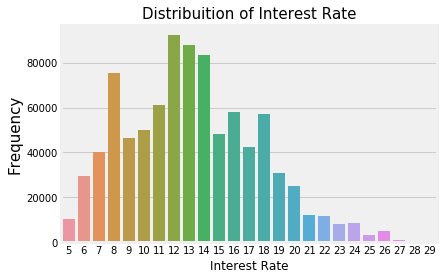

In [94]:
#Interest Rate 

loan['int_round'] = loan['int_rate'].round(0).astype(int) #rounding figure 

g = sns.countplot(x="int_round",data=loan)
g.set_xlabel('Interest Rate', fontsize=12)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Interest Rate", fontsize = 15)

plt.show()



From diagram, only a few observations are with interest rate higher than 21%, while most of interest rate are between 11% and 18%.
Half of the loan have interest rate between 12% and 18%. The minimum interest rate is around 5% while the maximum interest rate is 12%.
Therefore, compred with bank's interest rate, they are higher interest rate but this is because these loans are not protected. 
On average, investors can expect interest rate of 13%. 

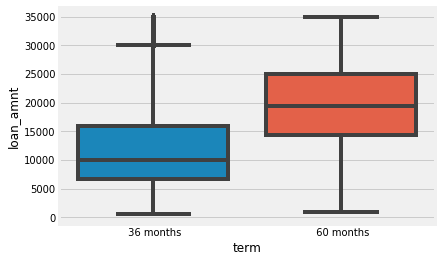

In [95]:
sns.boxplot(loan.term, loan.loan_amnt)
#There are 2 terms of payment on the loan: 36 & 60 months.
#Whereas most of the loans are given on 36 months term.

Text(0.5,1,'Distribution of Loan Status by Grading Scores')

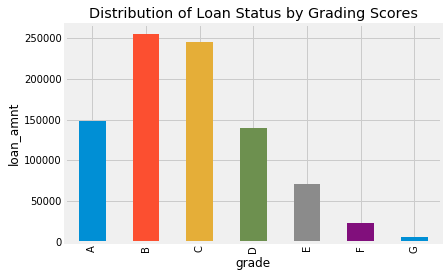

In [96]:
loan.grade.value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('grade')
plt.ylabel('loan_amnt')
plt.title('Distribution of Loan Status by Grading Scores')



Grade A- G is assigned in which grade B is having maximum loan amount whereas grade G is minimum.

Text(0.5,1,'Distribution of Loan by Purpose')

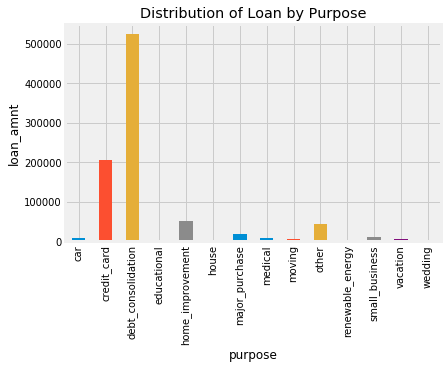

In [98]:
loan.purpose.value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('purpose')
plt.ylabel('loan_amnt')
plt.title('Distribution of Loan by Purpose')




There are 14 different purposes where the loan is borrowed from Lending Club.
Most of loans are borrowed for debt_consolidation followed by credit_card.
Most risky loans are for small business as these loans are not fully paid.
However, these loans make only a small percentage of all loans.
Finally, house credits make a few percentage of all credits which mean banks offer much better loans for houses.


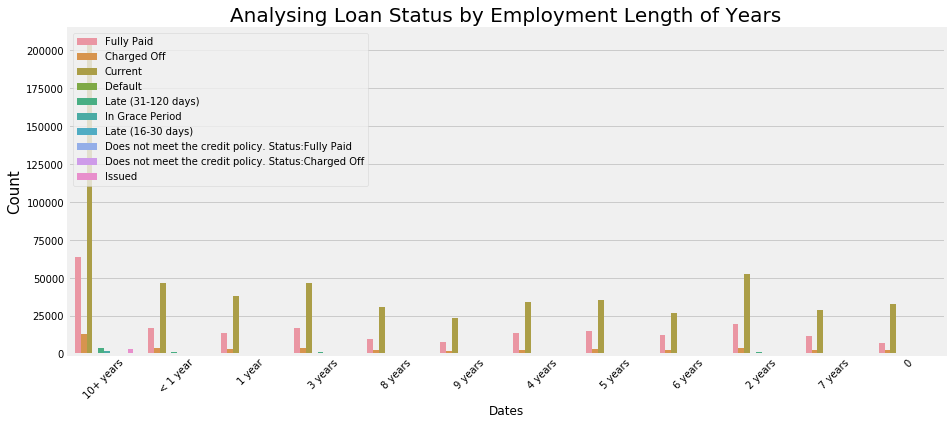

In [99]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='emp_length', data=loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
g.set_xlabel('Dates', fontsize=12)
g.set_ylabel('Count', fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Employment Length of Years", fontsize=20)
plt.show()


Currently borrowers with 10 years plus employment are borrowing highest.




Text(0.5,1,'Distribution by Duration')

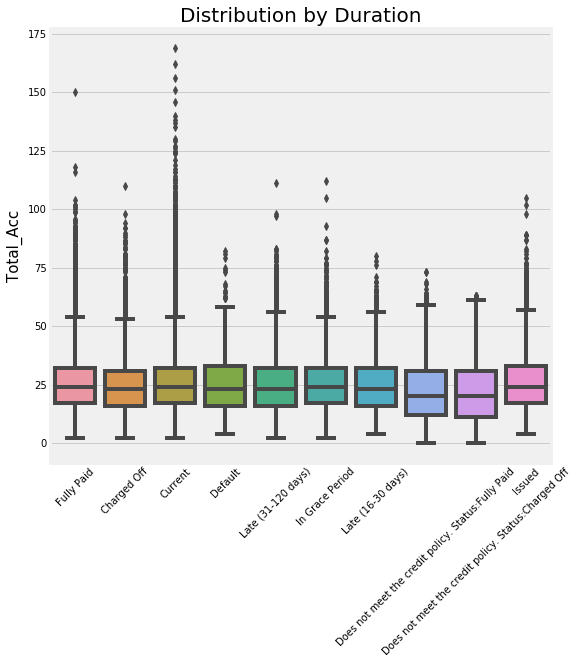

In [100]:
plt.figure(figsize = (8,8))

g = sns.boxplot(x = 'loan_status', y = 'total_acc', data=loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel('', fontsize=12)
g.set_ylabel('Total_Acc', fontsize=15)
g.set_title('Distribution by Duration', fontsize=20)



The highest number of credit lines are from borrower credit file currently

**KNN Classification**

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

In [10]:
feature_cols = ['dti', 'installment', 'loan_amnt', 'funded_amnt', 'int_rate']

X = loan[feature_cols]
y = loan.loan_status

In [ ]:
#Partition the data into train and testing 

In [11]:
#use train/test/ split with different random_state values 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4) #random state can change

#check classification accuracy of KNN with K = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#Test the modle on testing set and check the acuuracy
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6628321575875048


66 % of accuracy 

In [ ]:
#K-Fold cross-validation 

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [13]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print(scores)

[0.45806946 0.62973856 0.59463602 0.60590728 0.70498546 0.72808718
 0.6800018  0.66668921 0.66555474 0.62609176]


In [ ]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

#plot the value of K for KNN (x-axis) VS the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')



In [ ]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [ ]:
#Building the K Nearest Neighbor Classifier

In [12]:
loan_knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
loan_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [13]:
loan_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
#Predict 

In [14]:
loan_knn.predict(X_test)

array(['Current', 'Current', 'Current', ..., 'Current', 'Current',
       'Current'], dtype=object)

**Evaluting the classifer model Using R squared**

In [15]:
#R-square from training and test data
rsquared_train = loan_knn.score(X_train, y_train)
rsquared_test = loan_knn.score(X_test, y_test)
print('Training data R-squared:')
print(rsquared_train)
print('Test data R-squared')
print(rsquared_test)

Training data R-squared:
0.7177845158925014
Test data R-squared
0.6796637291802835


R-squared is a statistical measure of how close the data are fitted regression line.

**Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = loan_knn.predict(X_test))
print("The Confusion matrix:\n", knn_confusion_matrix)


The Confusion matrix:
 [[   276   8743      0      0      1   2246      0      0      0      2]
 [   808 138631      0      0      1  11100      0      0      0      2]
 [     8    274      0      0      0     30      0      0      0      0]
 [     4    133      0      0      2     68      0      0      0      0]
 [    10    323      0      0      2    144      0      0      0      0]
 [   625  39301      0      0      4  11871      0      0      0      1]
 [    20   1396      0      0      0    160      0      0      0      0]
 [     5   1937      0      0      0    189      0      0      0      0]
 [     6    542      0      0      0     62      0      0      0      0]
 [    36   2602      0      0      0    280      0      0      0      0]]


Confusion matrix is used to describe the performance of classification model on a set of test data.
The number of correct & incorrect predictions are summarized with count vales and broken down by each class.

Recall/ Precision: some of the mostly used measures in evaluating how good the system works.

In [17]:
from sklearn.metrics import classification_report
knn_classify_report = classification_report(y_true = y_test,
                                            y_pred = loan_knn.predict(X_test))

print(knn_classify_report)

                                                     precision    recall  f1-score   support

                                        Charged Off       0.15      0.02      0.04     11268
                                            Current       0.72      0.92      0.81    150542
                                            Default       0.00      0.00      0.00       312
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00       207
 Does not meet the credit policy. Status:Fully Paid       0.20      0.00      0.01       479
                                         Fully Paid       0.45      0.23      0.30     51802
                                    In Grace Period       0.00      0.00      0.00      1576
                                             Issued       0.00      0.00      0.00      2131
                                  Late (16-30 days)       0.00      0.00      0.00       610
                                 Late (31-120 days)       0.00      0

/Users/Dahu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
feature_cols_num = ['dti', 'installment'] #creating feature cols variable
feature_cols_cat = ['term', 'grade']
X_num = loan[feature_cols]
X_cat = pd.get_dummies(loan[feature_cols_cat])
X = pd.concat(X_num, X_cat)
#standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X = loan[feature_cols]
y = loan.loan_status

KeyError: "['term_36 months' 'term_60 months' 'diti'] not in index"

**Conclusion**

A borrower that chooses a short term for the life of a loan implies that they are commiteed to paying off debt as quickly as possible.
It suggests that they have the means to handle the higher monthly payment.
However, we have found that the shorter loan term had more defaults than the lengthier term.
The longer term loan translates to borrowers having the ability to budget and smaller monthly payment, the investor benefiting from longer living cash flow on his investment.